In [1]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors as mcolors
import locale
from locale import atof
import seaborn as sns

In [2]:
sns.set_palette('deep',desat = .6)
sns.set_context(rc = {'figure.figsize':(8,4)})

In [3]:
crime = pd.read_csv('BostonCrime/crime.csv')

In [4]:
crime.shape

(195622, 17)

In [30]:
crime_goodlats.shape

(195264, 17)

In [4]:
pd.set_option('display.max_rows',20)

In [97]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I172047308,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,130,NaN,2017-06-13 21:55:00,2017,6,Tuesday,21,Part Three,HUNTINGTON AVE,42.348577,-71.077720,"(42.34857652, -71.07772012)"
1,I172047296,802,Simple Assault,ASSAULT SIMPLE - BATTERY,B2,326,NaN,2017-06-13 20:53:00,2017,6,Tuesday,20,Part Two,QUINCY ST,42.313322,-71.075915,"(42.31332153, -71.07591511)"
2,I172047293,802,Simple Assault,ASSAULT SIMPLE - BATTERY,B2,331,NaN,2017-06-13 21:01:00,2017,6,Tuesday,21,Part Two,BAKER AVE,42.312387,-71.070862,"(42.31238668, -71.07086154)"
3,I172047291,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,A1,67,NaN,2017-06-06 09:00:00,2017,6,Tuesday,9,Part One,ANDERSON ST,42.360306,-71.067789,"(42.36030562, -71.06778870)"
4,I172047289,3301,Verbal Disputes,VERBAL DISPUTE,E18,516,NaN,2017-06-13 21:01:00,2017,6,Tuesday,21,Part Three,TRUMAN PKWY,42.251278,-71.120194,"(42.25127804, -71.12019402)"
5,I172047288,3114,Investigate Property,INVESTIGATE PROPERTY,NaN,,NaN,2017-06-13 21:33:00,2017,6,Tuesday,21,Part Three,NaN,42.308064,-71.065067,"(42.30806374, -71.06506719)"
6,I172047287,2629,Harassment,HARASSMENT,B2,324,NaN,2017-06-13 21:42:00,2017,6,Tuesday,21,Part Two,DANUBE ST,42.317439,-71.075478,"(42.31743922, -71.07547845)"
7,I172047286,1830,Drug Violation,DRUGS - SICK ASSIST - HEROIN,D4,,NaN,2017-06-13 21:12:00,2017,6,Tuesday,21,Part Two,NaN,42.344316,-71.074464,"(42.34431640, -71.07446411)"
8,I172047283,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,235,NaN,2017-05-28 09:00:00,2017,5,Sunday,9,Part Three,BUTTONWOOD ST,42.320878,-71.055852,"(42.32087815, -71.05585215)"
9,I172047282,3115,Investigate Person,INVESTIGATE PERSON,NaN,,NaN,2017-06-13 20:45:00,2017,6,Tuesday,20,Part Three,NaN,42.335066,-71.078791,"(42.33506554, -71.07879088)"


# Toss out the records that don't have coordinates'

In [78]:
bad_coords = ((crime['Lat'] < 42)|np.isnan(crime['Lat'])|(crime['Lat'] > 43)|(crime['Long'] < -72)|(crime_goodlats['Long'] > -70)|np.isnan(crime['Long']))
#print sum(wrong_or_nanlats)
crime_goodcoords = crime[np.invert(bad_coords)]

# Create histograms of crime_goodcoords

In [ ]:
hist, x_edges, y_edges = np.histogram2d(gamma_list, k23_list, bins=50)

# Create a scatter plot of crime_goodcoords

plt.figure()
crime_goodlats.plot(x = 'Long', y = 'Lat',kind = 'scatter')

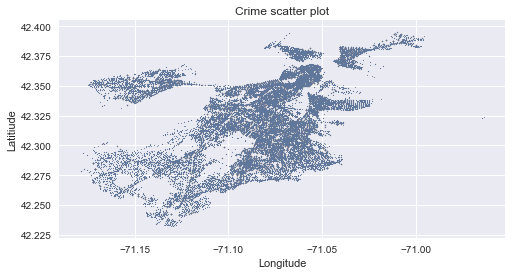

In [94]:
plt.scatter(x = crime_goodlats.Long,y = crime_goodlats.Lat, s= 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitiude')
plt.title('Crime scatter plot')
plt.show()

Now group the crime_goodLats by offence type and create scatter plots of these by OFFENCE_CODE_GROUP:

# Plot scatter plots of all the offences on top of each other:

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
grouped_cg = crime_goodlats.groupby('OFFENSE_CODE_GROUP') 
i = 0
for crime_type,group in grouped_crimes:
    plt.scatter(x = crime_goodlats.Long,y = crime_goodlats.Lat, s= 0.5,c = mycolors[i])
    i += 1
plt.xlabel('Longitude')
plt.ylabel('Latitiude')
plt.title('Crime scatter plot')
plt.show()


crime.OFFENSE_CODE_GROUP.value_counts()

(-71.178673779999997,
 -70.963676149999998,
 42.232413299999997,
 42.395041579999997)

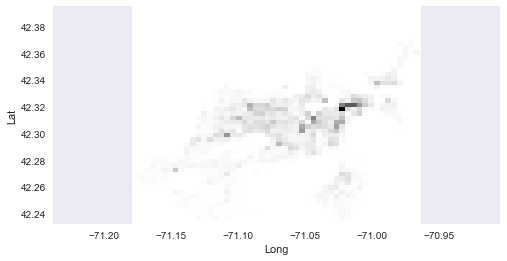

In [96]:
hist, x_edges, y_edges = np.histogram2d(crime_goodcoords.Long,crime_goodcoords.Lat,bins = 50)
X, Y = np.meshgrid(x_edges,y_edges)
plt.pcolormesh(X, Y, hist)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.axis('equal')

In [92]:
#plt.hist(crime_goodcoords.Lat,bins = 50)

In [93]:
#crime.SHOOTING.value_counts(dropna = False)

In [99]:
crime_types = crime.OFFENSE_CODE_GROUP.value_counts()

In [100]:
len(crime_types)

67

In [101]:
crime.DAY_OF_WEEK.value_counts()

Friday       29630
Tuesday      28611
Wednesday    28564
Thursday     28459
Monday       28213
Saturday     27426
Sunday       24719
Name: DAY_OF_WEEK, dtype: int64

In [102]:
grouped_crimes = crime.groupby('OFFENSE_CODE_GROUP')

In [103]:
t = (pd.DataFrame(group.DAY_OF_WEEK.value_counts()) for crime_type,group in grouped_crimes)

In [104]:
days_frame = pd.DataFrame()
for crime_type,group in grouped_crimes:
    day_count = group.DAY_OF_WEEK.value_counts()
    weekdays = map(str,day_count.index.values)
    day_count_array = day_count.values
    this_df = pd.DataFrame(data = day_count_array.reshape(1,len(day_count_array)),index = [crime_type],columns = weekdays)
    days_frame = pd.concat([days_frame,this_df],axis = 0)
    #print type(group)
    #print crime_type
    #days.index.values = crime_type
    #days_frame = days_frame.append(days) 
    

In [105]:
days_frame

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Aggravated Assault,671.0,613.0,776.0,750.0,685.0,640.0,612.0
Aircraft,2.0,NaN,3.0,3.0,2.0,4.0,3.0
Arson,3.0,7.0,12.0,9.0,14.0,6.0,7.0
Assembly or Gathering Violations,105.0,69.0,224.0,148.0,42.0,42.0,48.0
Auto Theft,446.0,441.0,411.0,433.0,426.0,419.0,420.0
Auto Theft Recovery,91.0,84.0,77.0,74.0,99.0,86.0,101.0
Ballistics,81.0,84.0,114.0,98.0,78.0,86.0,70.0
Bomb Hoax,14.0,12.0,5.0,2.0,12.0,10.0,8.0
Burglary - No Property Taken,NaN,1.0,NaN,NaN,NaN,1.0,NaN
Commercial Burglary,124.0,132.0,131.0,124.0,100.0,136.0,123.0


In [112]:
aux = days_frame.ix['Aggravated Assault',:]
print aux

Friday       671.0
Monday       613.0
Saturday     776.0
Sunday       750.0
Thursday     685.0
Tuesday      640.0
Wednesday    612.0
Name: Aggravated Assault, dtype: float64


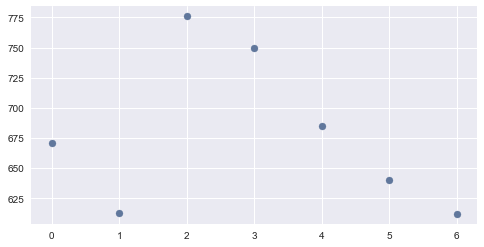

In [115]:
plt.scatter(range(7),aux.values)

In [114]:
aux.values

array([ 671.,  613.,  776.,  750.,  685.,  640.,  612.])

In [103]:
pd.DataFrame(data = day_count.values.reshape(1,7),index = [crime_type],columns = weekdays)

,Tuesday,Thursday,Wednesday,Monday,Friday,Saturday,Sunday
Warrant Arrests,864,836,813,747,746,488,379


In [96]:
day_count.values

array([864, 836, 813, 747, 746, 488, 379], dtype=int64)

In [61]:
days = pd.DataFrame(day_count).T

In [62]:
days

,Tuesday,Thursday,Wednesday,Monday,Friday,Saturday,Sunday
DAY_OF_WEEK,864,836,813,747,746,488,379


In [63]:
days.index.names = ['0']

In [75]:
choss = pd.DataFrame(data = crime_type,index = ['0'],columns= ['Crime Type'])

In [76]:
choss

,Crime Type
0,Warrant Arrests


In [80]:
an = pd.concat([days,choss],axis = 1)

In [81]:
an

,Tuesday,Thursday,Wednesday,Monday,Friday,Saturday,Sunday,Crime Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Warrant Arrests
DAY_OF_WEEK,864.0,836.0,813.0,747.0,746.0,488.0,379.0,NaN


,Tuesday,Thursday,Wednesday,Monday,Friday,Saturday,Sunday
goozz,,,,,,,
DAY_OF_WEEK,864,836,813,747,746,488,379


In [38]:
days.rename(index = {0:'gooz'})

,Tuesday,Thursday,Wednesday,Monday,Friday,Saturday,Sunday
DAY_OF_WEEK,864,836,813,747,746,488,379


In [ ]:
days

In [26]:
crime[crime.OFFENSE_CODE_GROUP == 'Aircraft']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
21258,I172024049,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2017-03-28 11:24:00,2017,3,Tuesday,11,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
22851,I172022364,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2017-03-22 10:59:00,2017,3,Wednesday,10,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148383,I152101381,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2015-12-08 13:42:00,2015,12,Tuesday,13,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
178375,I152068526,3122,Aircraft,AIRCRAFT INCIDENTS,D4,624,NaN,2015-08-18 21:50:00,2015,8,Tuesday,21,Part Three,BOYLSTON ST,42.344896,-71.096592,"(42.34489594, -71.09659186)"


In [5]:
lead = lead.set_index('Community Area Name')

In [10]:
lead_humboldt = lead.loc['Humboldt park']

In [14]:
rownames = lead_humboldt.index.values

In [18]:
screened_row = []
for row in rownames:
    match = re.search('Screened for Lead in',row)
    if match:
        screened_row.append(row)

In [22]:
screened = lead_humboldt[screened_row]

In [40]:
screened = pd.DataFrame(screened)

In [44]:
a = screened['Humboldt park']

In [110]:
b.apply(float)

Screened for Lead in 2000    3156.0
Screened for Lead in 2001    3261.0
Screened for Lead in 2002    3249.0
Screened for Lead in 2003    3103.0
Screened for Lead in 2004    2738.0
Screened for Lead in 2005    2991.0
Screened for Lead in 2006    3028.0
Screened for Lead in 2007    2999.0
Screened for Lead in 2008    3002.0
Screened for Lead in 2009    3248.0
Screened for Lead in 2010    3025.0
Screened for Lead in 2011    3049.0
Name: Humboldt park, dtype: float64

In [113]:
a1 = a.apply(lambda elt: str(atof(elt)) if isinstance(elt, str) else float(elt))

In [116]:
a1.apply(float)

Screened for Lead in 1999    3355.0
Screened for Lead in 2000    3156.0
Screened for Lead in 2001    3261.0
Screened for Lead in 2002    3249.0
Screened for Lead in 2003    3103.0
Screened for Lead in 2004    2738.0
Screened for Lead in 2005    2991.0
Screened for Lead in 2006    3028.0
Screened for Lead in 2007    2999.0
Screened for Lead in 2008    3002.0
Screened for Lead in 2009    3248.0
Screened for Lead in 2010    3025.0
Screened for Lead in 2011    3049.0
Screened for Lead in 2012    2931.0
Screened for Lead in 2013    2759.0
Name: Humboldt park, dtype: float64

In [97]:
b1 = b.values[0]

In [83]:
b.apply(int)

Screened for Lead in 1999    3355
Screened for Lead in 2000    3156
Screened for Lead in 2001    3261
Screened for Lead in 2002    3249
Screened for Lead in 2003    3103
Screened for Lead in 2004    2738
Screened for Lead in 2005    2991
Screened for Lead in 2006    3028
Screened for Lead in 2007    2999
Screened for Lead in 2008    3002
Screened for Lead in 2009    3248
Screened for Lead in 2010    3025
Name: Humboldt park, dtype: int64

In [77]:
a.apply(lambda x: str(x) for isinstance(x,int))

SyntaxError: invalid syntax (<ipython-input-77-dd11680d08da>, line 1)

In [76]:
str(a[14])

'2,759'

In [63]:
c = str(a[0])

In [64]:
c

'3355'

In [65]:
type(c)

str